This notebook describes the steps to apply a deep learning technique commonly
referred to as Transfer Learning. 

Specically, Transfer Learning can be used for deep
learning applications where either data or computational power are restricted.

In this notebook, we are using a Monkey dataset from kaggle:
https://www.kaggle.com/slothkong/10-monkey-species/home with limited number of training samples and perform fine grain classification to identify the species of monkeys using Transfer Learning

In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras.utils import np_utils
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import os

# **Load the Dataset**

Download and load the dataset. The data is already divided into training and validation set 

In [2]:
train_path = '/content/drive/MyDrive/SPR/monkey_dataset/training/training'
val_path = '/content/drive/MyDrive/SPR/monkey_dataset/validation/validation'
IMG_SIZE = 150
num_classes = 10

In [3]:
# function to read the image and store the image and its corresponding label in an array
def load_data(data_path):
  X = []
  Y = []
  train_folders = [x[1] for x in os.walk(data_path)]
  img_folders = train_folders[0]
  img_folders.sort()
  for i in range(len(img_folders)):
    path = data_path + '/' + img_folders[i]
    print(path)
    images = glob.glob(path + "/*.jpg")
    for image in images:
      img = cv2.imread(image,cv2.IMREAD_COLOR)
      img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
      X.append(np.array(img))
      Y.append(i)
  
  return np.array(X), np.array(Y)


In [4]:
x_train, y_train = load_data(train_path)
x_val, y_val = load_data(val_path)
train_labels = np_utils.to_categorical(y_train, num_classes)
val_labels = np_utils.to_categorical(y_val, num_classes)

/content/drive/MyDrive/SPR/monkey_dataset/training/training/n0
/content/drive/MyDrive/SPR/monkey_dataset/training/training/n1
/content/drive/MyDrive/SPR/monkey_dataset/training/training/n2
/content/drive/MyDrive/SPR/monkey_dataset/training/training/n3
/content/drive/MyDrive/SPR/monkey_dataset/training/training/n4
/content/drive/MyDrive/SPR/monkey_dataset/training/training/n5
/content/drive/MyDrive/SPR/monkey_dataset/training/training/n6
/content/drive/MyDrive/SPR/monkey_dataset/training/training/n7
/content/drive/MyDrive/SPR/monkey_dataset/training/training/n8
/content/drive/MyDrive/SPR/monkey_dataset/training/training/n9
/content/drive/MyDrive/SPR/monkey_dataset/validation/validation/n0
/content/drive/MyDrive/SPR/monkey_dataset/validation/validation/n1
/content/drive/MyDrive/SPR/monkey_dataset/validation/validation/n2
/content/drive/MyDrive/SPR/monkey_dataset/validation/validation/n3
/content/drive/MyDrive/SPR/monkey_dataset/validation/validation/n4
/content/drive/MyDrive/SPR/monkey_d

# **Training a simpe CNN**

First we train a simple convolutional neural network using these images (a very simple 3-5 convolutional network) and test the accuracy of the model using the validation set. 
Because of the low number of training samples, it is observed that the test accuracy of the model is lower than expected.

In [16]:
model = Sequential()

model.add(layers.Conv2D(4, (3,3), padding='same', activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(8, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(16, (3,3), padding='same', activation='relu'))
# model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 4)       112       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 4)      16        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 8)       296       
                                                                 
 batch_normalization_1 (Batc  (None, 150, 150, 8)      32        
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 8)        0         
 )                                                               
                                                      

In [17]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [18]:
history = model.fit(x_train, train_labels, batch_size=64, epochs=20,
                    validation_data=(x_val, val_labels))

Epoch 1/20
18/18 [==============================] - 3s 69ms/step - loss: 2.6345 - accuracy: 0.1359 - val_loss: 2.2990 - val_accuracy: 0.1066
Epoch 2/20
18/18 [==============================] - 1s 44ms/step - loss: 2.2585 - accuracy: 0.1460 - val_loss: 2.2937 - val_accuracy: 0.1066
Epoch 3/20
18/18 [==============================] - 1s 42ms/step - loss: 2.2078 - accuracy: 0.1606 - val_loss: 2.2853 - val_accuracy: 0.1140
Epoch 4/20
18/18 [==============================] - 1s 43ms/step - loss: 2.1642 - accuracy: 0.1761 - val_loss: 2.3127 - val_accuracy: 0.1507
Epoch 5/20
18/18 [==============================] - 1s 45ms/step - loss: 2.1364 - accuracy: 0.1788 - val_loss: 2.2579 - val_accuracy: 0.1434
Epoch 6/20
18/18 [==============================] - 1s 42ms/step - loss: 2.1153 - accuracy: 0.1843 - val_loss: 2.2457 - val_accuracy: 0.1618
Epoch 7/20
18/18 [==============================] - 1s 43ms/step - loss: 2.0701 - accuracy: 0.1916 - val_loss: 2.2091 - val_accuracy: 0.1765
Epoch 8/20
18

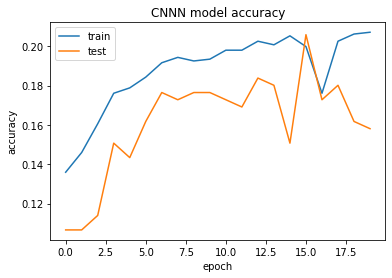

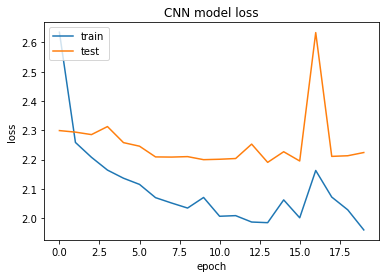

In [20]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#**Transfer Learning**

Now, Transfer learning is used to improve the accuracy of the model.

A pretrained model (for example VGG, ResNet,
InceptionNet) can be download and used as a feature extractor.
To do this, the last fully connected layers of the pretrained model are removed and replaced with untrained fully connected layers (model 1) to classify the monkey species.

During training, the convolutional layer parameters of the pretrained model are freezed so that they remain the same and only update the fully connected layers at the end. In this way, the convolutional layers act as
generalized feature extractors that have already been pretrained on millions of other images (that werent necessarily all monkeys) while the fully connected layers are able to take these features and classify our images.

In [5]:
# import the VGG model and load the weights ----> used as feature extractor
vgg_model=VGG16(include_top=False, weights='imagenet',input_shape=(150,150,3), pooling='avg')
# vgg_model.summary()

58889256/58889256 [==============================] - 2s 0us/step


In [6]:
# creating a model using VGG 
vgg_model.trainable=False # setting the VGG model to be untrainable.
model1=Sequential()
model1.add(vgg_model)
model1.add(Dense(256,activation='relu'))
model1.add(Dense(10,activation='softmax'))
model1.compile(optimizer=Adam(learning_rate=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
# training the model
epochs=50
batch_size=128
history1 = model1.fit(x_train,train_labels, epochs = 20, validation_data = (x_val,val_labels),verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
model1.save("transfer_learning_model")

Epoch 1/20
8/8 [==============================] - 20s 835ms/step - loss: 16.9761 - accuracy: 0.0876 - val_loss: 12.4545 - val_accuracy: 0.1544
Epoch 2/20
8/8 [==============================] - 3s 429ms/step - loss: 10.7845 - accuracy: 0.1661 - val_loss: 9.4742 - val_accuracy: 0.1765
Epoch 3/20
8/8 [==============================] - 3s 431ms/step - loss: 8.0446 - accuracy: 0.2400 - val_loss: 7.3743 - val_accuracy: 0.2463
Epoch 4/20
8/8 [==============================] - 3s 434ms/step - loss: 5.9772 - accuracy: 0.3558 - val_loss: 5.7073 - val_accuracy: 0.3603
Epoch 5/20
8/8 [==============================] - 4s 523ms/step - loss: 4.3737 - accuracy: 0.4361 - val_loss: 4.6145 - val_accuracy: 0.4301
Epoch 6/20
8/8 [==============================] - 3s 443ms/step - loss: 3.3070 - accuracy: 0.5100 - val_loss: 3.8177 - val_accuracy: 0.4779
Epoch 7/20
8/8 [==============================] - 3s 444ms/step - loss: 2.5303 - accuracy: 0.5949 - val_loss: 3.2038 - val_accuracy: 0.5662
Epoch 8/20
8/8 [

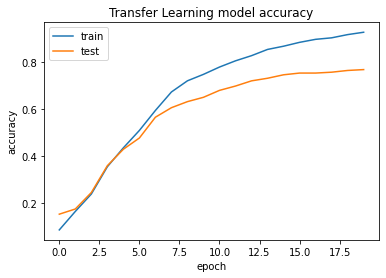

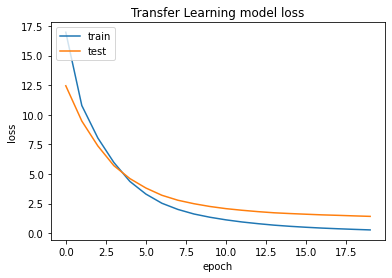

In [21]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Transfer Learning model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Transfer Learning model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

To further boost the performance of the network, the pretrained convolutional layers are unfreezed and the model is trained for a few more epochs with a small step size to fine tune the network to extract even more predictive power.

In [8]:
model2 = keras.models.load_model("transfer_learning_model")
vgg_model.trainable=True 
history2 = model2.fit(x_train,train_labels, epochs = 5, validation_data = (x_val,val_labels),verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
model2.save("final_transfer_learning_model")

Epoch 1/5
8/8 [==============================] - 4s 464ms/step - loss: 0.2756 - accuracy: 0.9206 - val_loss: 1.3143 - val_accuracy: 0.7868
Epoch 2/5
8/8 [==============================] - 3s 438ms/step - loss: 0.1685 - accuracy: 0.9453 - val_loss: 1.2457 - val_accuracy: 0.7978
Epoch 3/5
8/8 [==============================] - 3s 445ms/step - loss: 0.1053 - accuracy: 0.9699 - val_loss: 1.1547 - val_accuracy: 0.8125
Epoch 4/5
8/8 [==============================] - 3s 446ms/step - loss: 0.0677 - accuracy: 0.9836 - val_loss: 1.1170 - val_accuracy: 0.8199
Epoch 5/5
8/8 [==============================] - 4s 454ms/step - loss: 0.0470 - accuracy: 0.9891 - val_loss: 1.0810 - val_accuracy: 0.8309


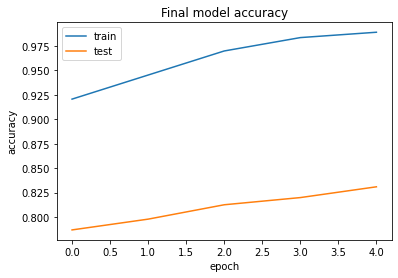

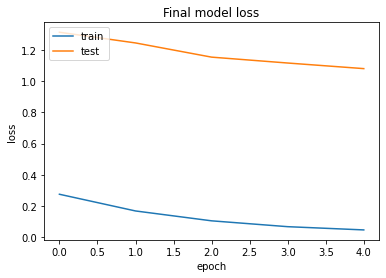

In [22]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Final model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Final model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()